In [ ]:
import sys
print(f"Python path: {sys.executable}")

# Try importing required packages
import pandas as pd
print(f"pandas version: {pd.__version__}")

import numpy as np
print(f"numpy version: {np.__version__}")

try:
    from rdkit import Chem
    print(f"rdkit is installed and working")
except ImportError:
    print("Need to install rdkit")
    !pip install rdkit-pypi

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

url = 'https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv'
df = pd.read_csv(url)

# Display first few rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1128, 10)


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [2]:
# Display basic statistics
print(f"Dataset shape: {df.shape}")
print(df.describe())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Dataset shape: (1128, 10)
       ESOL predicted log solubility in mols per litre  Minimum Degree  \
count                                      1128.000000     1128.000000   
mean                                         -2.988192        1.058511   
std                                           1.683220        0.238560   
min                                          -9.702000        0.000000   
25%                                          -3.948250        1.000000   
50%                                          -2.870000        1.000000   
75%                                          -1.843750        1.000000   
max                                           1.091000        2.000000   

       Molecular Weight  Number of H-Bond Donors  Number of Rings  \
count       1128.000000              1128.000000      1128.000000   
mean         203.937074                 0.701241         1.390957   
std          102.738077                 1.089727         1.318286   
min           16.043000        

In [6]:
# Convert SMILES strings to RDKit molecule objects
def smiles_to_mol(smiles):
    return Chem.MolFromSmiles(smiles)

df['mol'] = df['smiles'].apply(smiles_to_mol)

# Filter out failed conversions
df = df[df['mol'].notnull()].reset_index(drop=True)


In [7]:
# Extract molecular descriptors
def get_descriptors(mol):
    features = {}
    features['MolWt'] = Descriptors.MolWt(mol)
    features['LogP'] = Descriptors.MolLogP(mol)
    features['NumHDonors'] = Descriptors.NumHDonors(mol)
    features['NumHAcceptors'] = Descriptors.NumHAcceptors(mol)
    features['NumRotatableBonds'] = Descriptors.NumRotatableBonds(mol)
    features['NumAromaticRings'] = Descriptors.NumAromaticRings(mol)
    return features

# Apply to all molecules
features_df = pd.DataFrame([get_descriptors(mol) for mol in df['mol']])

# Combine with original data
df = pd.concat([df, features_df], axis=1)
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,mol,MolWt,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NumAromaticRings
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x7126bb182d50>,457.432,-3.10802,7,12,7,1
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x7126bb182ce0>,201.225,2.84032,1,2,2,2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x7126bb182b90>,152.237,2.87800,0,1,4,0
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x7126bb182b20>,278.354,6.29940,0,0,0,5
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x7126bb182ab0>,84.143,1.74810,0,1,0,1


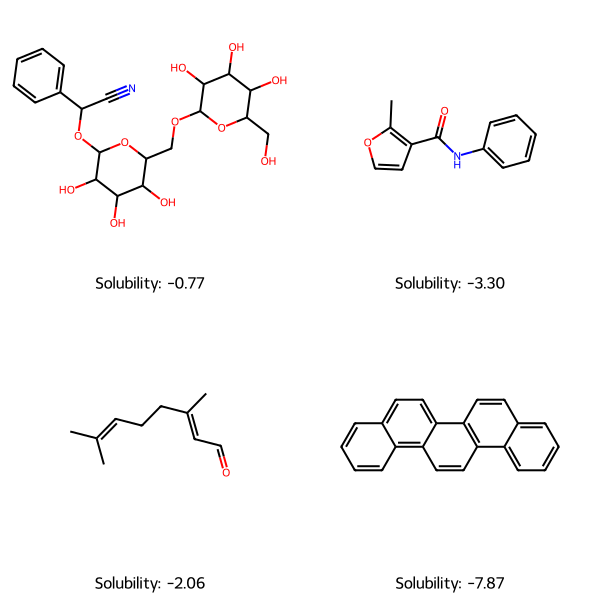

In [8]:
from rdkit.Chem import Draw

# Display first 4 molecules
mols = df['mol'][:4].tolist()
legends = [f"Solubility: {sol:.2f}" for sol in df['measured log solubility in mols per litre'][:4]]
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=legends)
img

In [10]:
# Save to CSV (excluding mol column)
df_save = df.drop('mol', axis=1)
df_save.to_csv('processed_esol_data.csv', index=False)

In [11]:
import os
print(f"Current working directory: {os.getcwd()}")

Current working directory: /home/ria/Documents/YRP_iiit/Mac_Lea/molecular_property_prediction/venv
